# 2. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('socialmedia-disaster-tweets.csv', index_col=False, header=0)

dataset

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,10871,778261105,True,golden,100,NaN,Relevant,0.7629,Relevant,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,5675678.0,NaN
10872,10872,778261106,True,golden,90,NaN,Relevant,0.9203,Relevant,NaN,NaN,Police investigating after an e-bike collided ...,4234.0,NaN
10873,10873,778261107,True,golden,102,NaN,Relevant,1.0000,Relevant,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,3242.0,NaN
10874,10874,778261108,True,golden,96,NaN,Relevant,0.8419,Relevant,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,457.0,NaN


In [2]:
missing_data = dataset.isnull().sum().to_frame()
missing_data = missing_data.rename(columns={0:'Empty Cells'})

print(missing_data)
print("The shape of dataset:", dataset.shape)

                       Empty Cells
index                            0
_unit_id                         0
_golden                          0
_unit_state                      0
_trusted_judgments               0
_last_judgment_at               84
choose_one                       0
choose_one:confidence            0
choose_one_gold              10789
keyword                         87
location                      3638
text                             0
tweetid                          0
userid                          87
The shape of dataset: (10876, 14)


## 2.1 Delections of Lines

In [3]:
dataset = dataset.dropna(subset=["keyword"])

missing_data = dataset.isnull().sum().to_frame()
missing_data = missing_data.rename(columns={0:'Empty Cells'})

print(missing_data)
print("The shape of dataset:", dataset.shape)

                       Empty Cells
index                            0
_unit_id                         0
_golden                          0
_unit_state                      0
_trusted_judgments               0
_last_judgment_at                0
choose_one                       0
choose_one:confidence            0
choose_one_gold              10789
keyword                          0
location                      3551
text                             0
tweetid                          0
userid                           0
The shape of dataset: (10789, 14)


In [4]:
dataset = dataset[dataset["choose_one:confidence"] >= 0.9]

print("The shape of dataset:", dataset.shape)

The shape of dataset: (4993, 14)


## 2.2 Additions of Columns

### cleaned_text

In [5]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    changed_text = ""
    for letter in text:
        if (letter.isalpha() or letter.isnumeric() or letter.isspace()):
            "".join(letter)
            letter = letter.lower()
            changed_text = changed_text + letter
    return changed_text

def lemmatize_word(text):
    changed_text = ""
    for word in text.split(" "):
        word = lemmatizer.lemmatize(word, pos="v")
        changed_text = changed_text + word + " "
    return changed_text

print("Functions completed.")

Functions completed.


In [6]:
cleaned_text = []

for text in dataset["text"]:
    text_1 = clean_text(text)
    cleaned_text.append(text_1)
    
dataset["cleaned_text"] = cleaned_text

print(dataset["cleaned_text"])

46       birmingham wholesale market is ablaze bbc news...
47       sunkxssedharry will you wear shorts for race a...
49       we always try to bring the heavy metal rt http...
51       previouslyondoyintv toke makinwaûªs marriage c...
52                       crying out for more set me ablaze
                               ...                        
10821    cramer igers 3 words that wrecked disneys stoc...
10825    cramer 3 words that wrecked dis stock  httptco...
10827         he just wrecked all of you httptcoy46isyzkc8
10828                       wrecked today got my hattrick 
10832    fx forex trading cramer igers 3 words that wre...
Name: cleaned_text, Length: 4993, dtype: object


In [7]:
lemmatized_text = []

for text in dataset["cleaned_text"]:
    text_2 = lemmatize_word(text)
    lemmatized_text.append(text_2)

dataset["cleaned_text"] = lemmatized_text

print(dataset["cleaned_text"])

46       birmingham wholesale market be ablaze bbc news...
47       sunkxssedharry will you wear short for race ab...
49       we always try to bring the heavy metal rt http...
51       previouslyondoyintv toke makinwaûªs marriage c...
52                         cry out for more set me ablaze 
                               ...                        
10821    cramer igers 3 word that wreck disneys stock h...
10825    cramer 3 word that wreck dis stock  httptcoud7...
10827          he just wreck all of you httptcoy46isyzkc8 
10828                        wreck today get my hattrick  
10832    fx forex trade cramer igers 3 word that wreck ...
Name: cleaned_text, Length: 4993, dtype: object


### is_disaster

In [8]:
is_disaster = []

for value in dataset["choose_one"]:
    if value == "Relevant":
        is_disaster.append("True")
    elif value == "Not Relevant":
        is_disaster.append("False")
    else:
        is_disaster.append("Not Sure")
        
dataset["is_disaster"] = is_disaster

print(dataset["is_disaster"])

46        True
47       False
49       False
51       False
52       False
         ...  
10821    False
10825    False
10827    False
10828    False
10832    False
Name: is_disaster, Length: 4993, dtype: object


### disaster_type

In [9]:
dataset["keyword"] = dataset["keyword"].str.replace("%20", " ")

print(dataset["keyword"].unique())
print("The number of unique keyword:", len(dataset["keyword"].unique()))

['ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bag' 'body bagging' 'body bags' 'bomb'
 'bombed' 'bombing' 'bridge collapse' 'buildings burning'
 'buildings on fire' 'burned' 'burning' 'burning buildings' 'bush fires'
 'casualties' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collapsed' 'collide' 'collided' 'collision'
 'crash' 'crashed' 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger'
 'dead' 'death' 'deaths' 'debris' 'deluge' 'deluged' 'demolish'
 'demolished' 'demolition' 'derail' 'derailed' 'derailment' 'desolate'
 'desolation' 'destroy' 'destroyed' 'destruction' 'detonate' 'detonation'
 'devastated' 'devastation' 'disaster' 'displaced' 'drought' 'drown'
 'drowned' 'drowning'

In [10]:
dataset_disaster = pd.read_excel('disaster_classification.xlsx', header=0)

dataset_disaster

,keyword,cleaned_keyword,disaster_type
0,ablaze,blaze,fire
1,accident,accident,accident
2,aftershock,aftershock,earthquake
3,airplane accident,airplane accident,accident
4,ambulance,ambulance,accident
...,...,...,...
216,wounded,wound,man-made disaster
217,wounds,wound,man-made disaster
218,wreck,wreck,accident
219,wreckage,wreck,accident


In [11]:
dataset["disaster_type"] = dataset["keyword"].replace(dataset_disaster["keyword"].to_list(), dataset_disaster["disaster_type"].to_list())

print(dataset["disaster_type"].unique())
print("The number of unique keyword:", len(dataset["disaster_type"].unique()))

['fire' 'accident' 'earthquake' 'general disaster' 'man-made disaster'
 'crime' 'mass movement' 'storm' 'flood' 'drought' 'famine' 'hail'
 'extreme temperature' 'volcano' 'tsunami']
The number of unique keyword: 15


## 2.3 Data Augmentation

In [12]:
print(dataset["disaster_type"].value_counts())

general disaster       1653
accident                927
man-made disaster       619
crime                   510
storm                   427
fire                    401
flood                   128
mass movement            86
earthquake               83
volcano                  52
hail                     27
drought                  22
extreme temperature      21
famine                   19
tsunami                  18
Name: disaster_type, dtype: int64


<Axes: xlabel='disaster_type'>

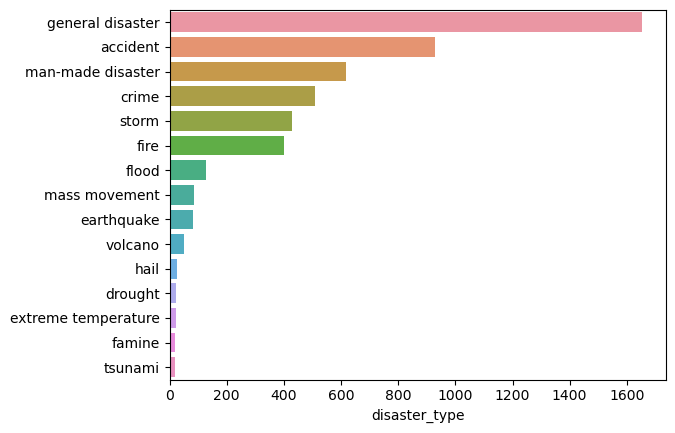

In [13]:
disaster_type = dataset["disaster_type"].value_counts()

sns.barplot(x=disaster_type, y=disaster_type.index)

In [14]:
from textaugment import EDA

eda_augment = EDA()

def synonym_replace_augment(text):
    augmented_text = eda_augment.synonym_replacement(text)
    return augmented_text

def random_delete_augment(text):
    augmented_text = eda_augment.random_deletion(text)
    return augmented_text

def random_swap_augment(text):
    augmented_text = eda_augment.random_swap(text)
    return augmented_text

def random_insert_augment(text):
    augmented_text = eda_augment.random_insertion(text)
    return augmented_text

def data_augment(dataset, disaster_list):
    augmented_dataset = pd.DataFrame()
    for index, row in dataset.iterrows():
        if row["disaster_type"] in disaster_list:
            augmented_text_1 = synonym_replace_augment(row["cleaned_text"])
            augmented_text_2 = random_delete_augment(row["cleaned_text"])
            augmented_text_3 = random_swap_augment(row["cleaned_text"])
            augmented_text_4 = random_insert_augment(row["cleaned_text"])
            df = pd.DataFrame({"cleaned_text":[augmented_text_1, augmented_text_2, augmented_text_3, augmented_text_4], 
                              "is_disaster":[row["is_disaster"], row["is_disaster"], row["is_disaster"], row["is_disaster"]],
                              "disaster_type":[row["disaster_type"], row["disaster_type"], row["disaster_type"], row["disaster_type"]]})
            augmented_dataset = pd.concat([augmented_dataset, df])
            
    return augmented_dataset

print("Functions completed.")
#text = "The quick brown fox jumps over the lazy dog."
#print(synonym_replace_augment(text))
#print(random_delete_augment(text))
#print(random_swap_augment(text))
#print(random_insert_augment(text))

Functions completed.


In [15]:
disaster_list_1 = ["tsunami", "famine", "extreme temperature", "drought", "hail", "volcano", "earthquake", "mass movement"]

augmented_dataset = data_augment(dataset, disaster_list_1)

dataset = pd.concat([dataset, augmented_dataset])

print(dataset["disaster_type"].value_counts())

general disaster       1653
accident                927
man-made disaster       619
crime                   510
mass movement           430
storm                   427
earthquake              415
fire                    401
volcano                 260
hail                    135
flood                   128
drought                 110
extreme temperature     105
famine                   95
tsunami                  90
Name: disaster_type, dtype: int64


## 2.4 Final Dataset

In [16]:
dataset_final = dataset[["cleaned_text", "is_disaster", "disaster_type"]]

dataset_final

,cleaned_text,is_disaster,disaster_type
46,birmingham wholesale market be ablaze bbc news...,True,fire
47,sunkxssedharry will you wear short for race ab...,False,fire
49,we always try to bring the heavy metal rt http...,False,fire
51,previouslyondoyintv toke makinwaûªs marriage c...,False,fire
52,cry out for more set me ablaze,False,fire
...,...,...,...
3,the architect tooshie behind kanye westûªs vol...,False,volcano
0,sismo m 5km s of volcano hawaii time20150806 ...,True,volcano
1,sismo m 19 5km s of volcano hawaii time2015080...,True,volcano
2,sismo m 19 5km s of 150401 hawaii time20150806...,True,volcano


# 3. Model Training

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


X1 = dataset_final.cleaned_text
y1 = dataset_final.is_disaster
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

print("Train and test sets for Model 1 are splited.")

X2 = dataset_final[dataset_final["is_disaster"] == "True"].cleaned_text
y2 = dataset_final[dataset_final["is_disaster"] == "True"].disaster_type
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

print("Train and test sets for Model 2 are splited.")

Train and test sets for Model 1 are splited.
Train and test sets for Model 2 are splited.


## 3.1 Model 1

In [18]:
# Naive Bayes

nb1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

nb1.fit(X1_train, y1_train)

y1_pred_nb = nb1.predict(X1_test)

print('accuracy score:', accuracy_score(y1_pred_nb, y1_test))

accuracy score: 0.927061310782241


In [19]:
# Support Vector Machine

svm1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

svm1.fit(X1_train, y1_train)

y1_pred_svm = svm1.predict(X1_test)

print('accuracy score:', accuracy_score(y1_pred_svm, y1_test))

accuracy score: 0.943446088794926


In [20]:
# Logistic Regression

lr1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

lr1.fit(X1_train, y1_train)

y1_pred_lr = lr1.predict(X1_test)

print('accuracy score:', accuracy_score(y1_pred_lr, y1_test))

accuracy score: 0.9365750528541226


## 3.2 Model 2

In [21]:
# Naive Bayes

nb2 = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())])

nb2.fit(X2_train, y2_train)

y2_pred_nb = nb2.predict(X2_test)

print('accuracy score:', accuracy_score(y2_pred_nb, y2_test))

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
print('cross validation score:', cross_val_score(nb2, X2, y2, cv=cv).mean())

accuracy score: 0.8088410991636799
cross validation score: 0.827820698442115


In [22]:
# Support Vector Machine

svm2 = Pipeline([('vect', CountVectorizer()), ('clf', LinearSVC())])

svm2.fit(X2_train, y2_train)

y2_pred_svm = svm2.predict(X2_test)

print('accuracy score:', accuracy_score(y2_pred_svm, y2_test))

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
print('cross validation score:', cross_val_score(svm2, X2, y2, cv=cv).mean())

accuracy score: 0.8817204301075269
cross validation score: 0.8922171386652766


In [23]:
# Logistic Regression

lr2 = Pipeline([('vect', CountVectorizer()), ('clf', LogisticRegression())])

lr2.fit(X2_train, y2_train)

y2_pred_lr = lr2.predict(X2_test)

print('accuracy score:', accuracy_score(y2_pred_lr, y2_test))

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
print('cross validation score:', cross_val_score(lr2, X2, y2, cv=cv).mean())

accuracy score: 0.8673835125448028
cross validation score: 0.8798115866489062


## 3.3 Model Testing

In [24]:
text = "My umbrella was broken by the strong wind!"
text = clean_text(text)
text = lemmatize_word(text)
#print(f"Preprocessed text: {text}")

df = pd.DataFrame({"text":text}, index=[0])

true_or_false = svm1.predict(df["text"])
disaster_category = svm2.predict(df["text"])

if true_or_false[0] == "True":
    print("Disaster category:", disaster_category[0])
elif true_or_false[0] == "False":
    print("The tweet is not related to a disaster.")
else:
    print("Invalid input.")

The tweet is not related to a disaster.


## 3.4 Pretrained Deep Learning Model

In [25]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

labels = dataset["disaster_type"].unique()

print("labels list:")
print(labels)

2023-12-11 11:25:17.807459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


labels list:
['fire' 'accident' 'earthquake' 'general disaster' 'man-made disaster'
 'crime' 'mass movement' 'storm' 'flood' 'drought' 'famine' 'hail'
 'extreme temperature' 'volcano' 'tsunami']


In [26]:
text = "My umbrella was broken by the strong wind!."
text = clean_text(text)
text = lemmatize_word(text)
#print(f"Preprocessed text: {text}")

result  = classifier(text, labels)
print("Disaster category:", result["labels"][0])

Disaster category: storm


# 4. Model Evaluation

(0.8, 1.0)

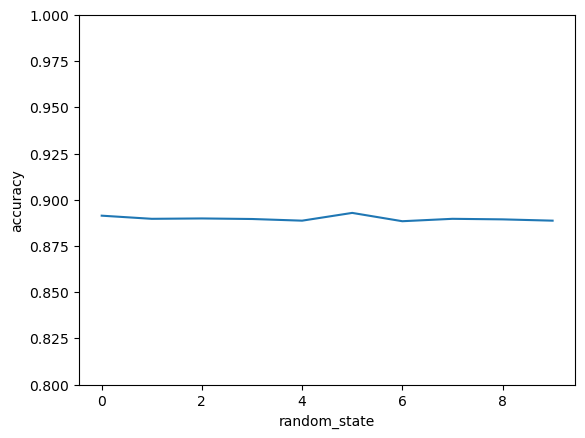

In [27]:
random_state_dict = {"random_state": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
                     "accuracy": [0.8914, 0.8897, 0.8899, 0.8896, 0.8887, 0.8929, 0.8884, 0.8897, 0.8894, 0.8887]}

dataset_random_state = pd.DataFrame(random_state_dict)

sns.lineplot(x="random_state", y="accuracy", data=dataset_random_state)

plt.ylim(0.80, 1.00)

(0.8, 1.0)

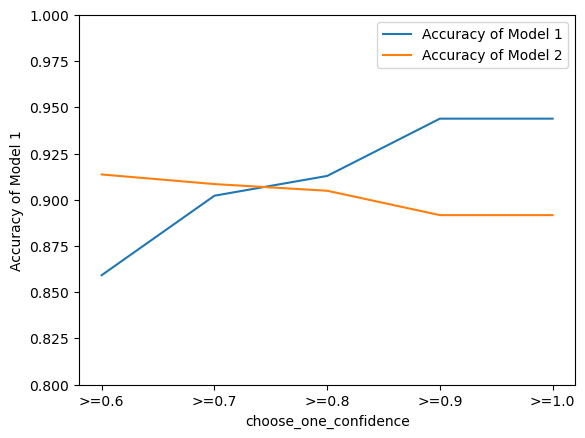

In [28]:
choose_one_confidence_dict = {"choose_one_confidence": [">=0.6", ">=0.7", ">=0.8", ">=0.9", ">=1.0"], 
                              "Accuracy of Model 1": [0.8592, 0.9022, 0.9129, 0.9439, 0.9439],
                              "Accuracy of Model 2": [0.9137, 0.9085, 0.9049, 0.8917, 0.8917]}

dataset_choose_one_confidence = pd.DataFrame(choose_one_confidence_dict)

sns.lineplot(data=dataset_choose_one_confidence, x="choose_one_confidence", y="Accuracy of Model 1", label="Accuracy of Model 1")
sns.lineplot(data=dataset_choose_one_confidence, x="choose_one_confidence", y="Accuracy of Model 2", label="Accuracy of Model 2")

plt.ylim(0.80, 1.00)

## 4.1 Classification Report

In [29]:
print(classification_report(y2_test, y2_pred_svm))

                     precision    recall  f1-score   support

           accident       0.85      0.88      0.87       157
              crime       0.90      0.92      0.91        96
            drought       0.93      1.00      0.96        25
         earthquake       0.95      1.00      0.97        39
extreme temperature       0.97      1.00      0.98        29
             famine       1.00      1.00      1.00        25
               fire       0.91      0.96      0.93        72
              flood       0.78      0.91      0.84        23
   general disaster       0.84      0.71      0.77       136
               hail       0.97      1.00      0.98        28
  man-made disaster       0.78      0.78      0.78        65
      mass movement       1.00      1.00      1.00        36
              storm       0.86      0.85      0.86        82
            tsunami       0.75      1.00      0.86         3
            volcano       0.95      0.90      0.93        21

           accuracy   

In [30]:
report = classification_report(y2_test, y2_pred_svm, output_dict=True)

dataset_report = pd.DataFrame(report).transpose()

dataset_report = dataset_report.drop(index=["accuracy", "macro avg", "weighted avg"])
dataset_report = dataset_report.drop(columns="support")

dataset_report

,precision,recall,f1-score
accident,0.851852,0.878981,0.865204
crime,0.897959,0.916667,0.907216
drought,0.925926,1.000000,0.961538
earthquake,0.951220,1.000000,0.975000
extreme temperature,0.966667,1.000000,0.983051
famine,1.000000,1.000000,1.000000
fire,0.907895,0.958333,0.932432
flood,0.777778,0.913043,0.840000
general disaster,0.836207,0.713235,0.769841
hail,0.965517,1.000000,0.982456


<Axes: >

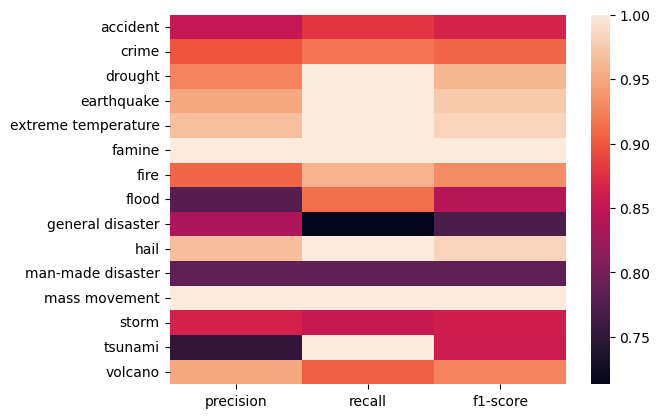

In [31]:
sns.heatmap(dataset_report)

## 4.2 Learning Curves

In [32]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X2, y2, cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    
print("Functions completed.")

Functions completed.


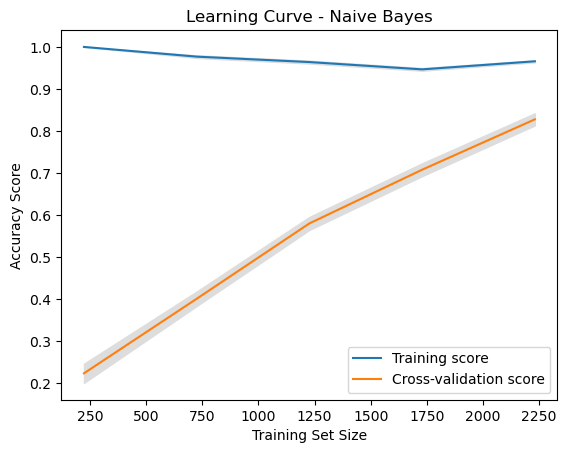

In [33]:
plot_learning_curve(nb2)
plt.title("Learning Curve - Naive Bayes")
plt.show()

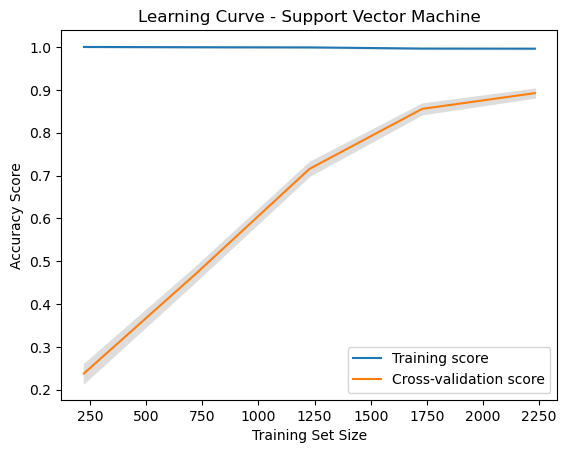

In [34]:
plot_learning_curve(svm2)
plt.title("Learning Curve - Support Vector Machine")
plt.show()

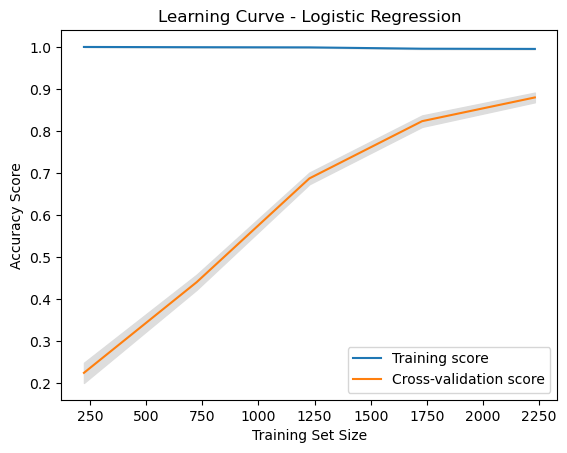

In [35]:
plot_learning_curve(lr2)
plt.title("Learning Curve - Logistic Regression")
plt.show()

# 5. Model Retrain

## 5.1 Data Preprocessing

In [36]:
dataset_new = pd.read_csv('additional-tweets.csv', index_col=False, header=0)

dataset_new

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [37]:
cleaned_text = []
for text in dataset_new["text"]:
    text_1 = clean_text(text)
    text_2 = lemmatize_word(text_1)
    cleaned_text.append(text_2)   
dataset_new["cleaned_text"] = cleaned_text

is_disaster = []
for value in dataset_new["target"]:
    if value == 1:
        is_disaster.append("True")
    elif value == 0:
        is_disaster.append("False")
    else:
        is_disaster.append("Not Sure")       
dataset_new["is_disaster"] = is_disaster

dataset_new["keyword"] = dataset_new["keyword"].str.replace("%20", " ")
dataset_new["disaster_type"] = dataset_new["keyword"].replace(dataset_disaster["keyword"].to_list(), dataset_disaster["disaster_type"].to_list())

print(dataset_new["disaster_type"].value_counts())

general disaster       3975
accident               2129
man-made disaster      1544
crime                  1245
storm                   807
fire                    765
flood                   238
earthquake              196
mass movement           189
volcano                  73
drought                  62
extreme temperature      51
hail                     49
famine                   41
tsunami                   6
Name: disaster_type, dtype: int64


In [38]:
disaster_list_2 = ["tsunami", "famine", "hail", "extreme temperature", "drought", "volcano"]

augmented_dataset_new = data_augment(dataset_new, disaster_list_2)

dataset_new = pd.concat([dataset_new, augmented_dataset_new])

print(dataset_new["disaster_type"].value_counts())

general disaster       3975
accident               2129
man-made disaster      1544
crime                  1245
storm                   807
fire                    765
volcano                 365
drought                 310
extreme temperature     255
hail                    245
flood                   238
famine                  205
earthquake              196
mass movement           189
tsunami                  30
Name: disaster_type, dtype: int64


In [39]:
dataset_new = dataset_new[dataset_new["disaster_type"].isin(
    ["tsunami", "mass movement", "earthquake", "famine", "flood", "hail", "extreme temperature", "drought", "volcano"])]

dataset_new_final = dataset_new[["cleaned_text", "is_disaster", "disaster_type"]]

final_dataset = dataset_final.append(dataset_new_final)

print(final_dataset["disaster_type"].value_counts())

general disaster       1653
accident                927
volcano                 625
man-made disaster       619
mass movement           619
earthquake              611
crime                   510
storm                   427
drought                 420
fire                    401
hail                    380
flood                   366
extreme temperature     360
famine                  300
tsunami                 120
Name: disaster_type, dtype: int64


/var/folders/5r/qt94qlfj34x9zlq_chxsrm5w0000gn/T/ipykernel_12276/3434318053.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset = dataset_final.append(dataset_new_final)


In [40]:
dataset_new = dataset_new[dataset_new["disaster_type"].isin(
    ["tsunami", "mass movement", "earthquake", "famine", "flood", "hail", "extreme temperature", "drought", "volcano"])]

dataset_new_final = dataset_new[["cleaned_text", "is_disaster", "disaster_type"]]

final_dataset = pd.concat([dataset_final, dataset_new_final])

print(final_dataset["disaster_type"].value_counts())

general disaster       1653
accident                927
volcano                 625
man-made disaster       619
mass movement           619
earthquake              611
crime                   510
storm                   427
drought                 420
fire                    401
hail                    380
flood                   366
extreme temperature     360
famine                  300
tsunami                 120
Name: disaster_type, dtype: int64


In [41]:
final_dataset

,cleaned_text,is_disaster,disaster_type
46,birmingham wholesale market be ablaze bbc news...,True,fire
47,sunkxssedharry will you wear short for race ab...,False,fire
49,we always try to bring the heavy metal rt http...,False,fire
51,previouslyondoyintv toke makinwaûªs marriage c...,False,fire
52,cry out for more set me ablaze,False,fire
...,...,...,...
3,philippine islands taal volcano eruption phili...,True,volcano
0,mayward batangas be organize a be a bless proj...,True,volcano
1,mayward batangas be organize a be a bless proj...,True,volcano
2,mayward batangas be organize a be taal bless p...,True,volcano


## 5.2 Model Training

In [42]:
X1 = final_dataset.cleaned_text
y1 = final_dataset.is_disaster
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

print("Train and test sets for Model 1 are splited.")

X2 = final_dataset[final_dataset["is_disaster"] == "True"].cleaned_text
y2 = final_dataset[final_dataset["is_disaster"] == "True"].disaster_type
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

print("Train and test sets for Model 2 are splited.")

Train and test sets for Model 1 are splited.
Train and test sets for Model 2 are splited.


In [43]:
# Naive Bayes

nb2 = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())])

nb2.fit(X2_train, y2_train)

y2_pred = nb2.predict(X2_test)

print('accuracy score:', accuracy_score(y2_pred, y2_test))

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
print('cross validation score:', cross_val_score(nb2, X2, y2, cv=cv).mean())

accuracy score: 0.8101135190918473
cross validation score: 0.8354179566563467


In [44]:
# Support Vector Machine

svm2 = Pipeline([('vect', CountVectorizer()), ('clf', LinearSVC())])

svm2.fit(X2_train, y2_train)

y2_pred = svm2.predict(X2_test)

print('accuracy score:', accuracy_score(y2_pred, y2_test))

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
print('cross validation score:', cross_val_score(svm2, X2, y2, cv=cv).mean())

accuracy score: 0.8864809081527347
cross validation score: 0.8986996904024768


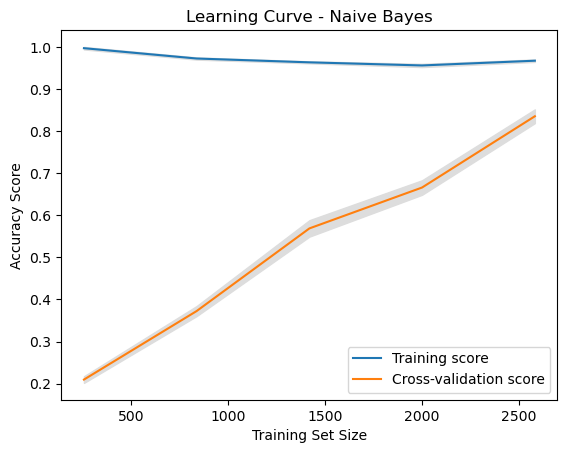

In [45]:
plot_learning_curve(nb2)
plt.title("Learning Curve - Naive Bayes")
plt.show()

In [ ]:
plot_learning_curve(svm2)
plt.title("Learning Curve - Support Vector Machine")
plt.show()